In [46]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_columns', 500)
from torch.utils.data import Dataset, DataLoader

In [2]:
df = pd.read_csv('data.csv')
labels = pd.read_csv('labels.csv')

In [40]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,txl1_x,txl1_y,txl1_z,txl2_x,txl2_y,txl2_z,txl3_x,txl3_y,txl3_z,txl4_x,txl4_y,txl4_z,txl5_x,txl5_y,txl5_z,txl6_x,txl6_y,txl6_z,txl7_x,txl7_y,txl7_z,txl8_x,txl8_y,txl8_z,txl9_x,txl9_y,txl9_z,txl10_x,txl10_y,txl10_z,txl11_x,txl11_y,txl11_z,txl12_x,txl12_y,txl12_z,txl13_x,txl13_y,txl13_z,txl14_x,txl14_y,txl14_z,txl15_x,txl15_y,txl15_z,txl16_x,txl16_y,txl16_z
0,15825.0,16435.0,39825.0,15955.0,16459.0,39477.0,15767.0,16355.0,39049.0,15264.0,16591.0,40432.0,15804.0,16539.0,38817.0,15890.0,16367.0,38264.0,15758.0,16392.0,38276.0,15566.0,16494.0,38594.0,16179.0,16362.0,38096.0,15985.0,16319.0,38264.0,15794.0,16181.0,37601.0,15631.0,16283.0,38356.0,16171.0,16215.0,38774.0,15976.0,16356.0,38258.0,15887.0,16228.0,37885.0,15693.0,16427.0,38642.0
1,15825.0,16435.0,39825.0,15955.0,16459.0,39477.0,15767.0,16355.0,39049.0,15264.0,16591.0,40432.0,15804.0,16539.0,38817.0,15890.0,16367.0,38264.0,15758.0,16392.0,38276.0,15566.0,16494.0,38594.0,16179.0,16362.0,38096.0,15985.0,16319.0,38264.0,15794.0,16181.0,37601.0,15631.0,16283.0,38356.0,16171.0,16215.0,38774.0,15976.0,16356.0,38258.0,15887.0,16228.0,37885.0,15693.0,16427.0,38642.0
2,15826.0,16436.0,39818.0,15955.0,16459.0,39482.0,15767.0,16354.0,39049.0,15265.0,16589.0,40434.0,15805.0,16539.0,38812.0,15890.0,16365.0,38264.0,15756.0,16394.0,38277.0,15563.0,16493.0,38594.0,16179.0,16362.0,38092.0,15985.0,16320.0,38265.0,15793.0,16183.0,37597.0,15630.0,16283.0,38347.0,16172.0,16217.0,38777.0,15975.0,16356.0,38252.0,15888.0,16231.0,37885.0,15692.0,16429.0,38641.0
3,15826.0,16435.0,39826.0,15956.0,16458.0,39478.0,15766.0,16354.0,39051.0,15264.0,16590.0,40438.0,15805.0,16540.0,38812.0,15892.0,16367.0,38269.0,15756.0,16394.0,38277.0,15563.0,16493.0,38594.0,16177.0,16360.0,38099.0,15986.0,16321.0,38265.0,15793.0,16183.0,37599.0,15630.0,16282.0,38353.0,16170.0,16215.0,38776.0,15975.0,16355.0,38257.0,15888.0,16231.0,37885.0,15692.0,16429.0,38641.0
4,15826.0,16432.0,39827.0,15956.0,16458.0,39483.0,15768.0,16355.0,39051.0,15265.0,16589.0,40437.0,15806.0,16537.0,38811.0,15892.0,16366.0,38263.0,15757.0,16393.0,38283.0,15563.0,16495.0,38593.0,16179.0,16360.0,38092.0,15988.0,16320.0,38271.0,15793.0,16182.0,37601.0,15630.0,16284.0,38350.0,16171.0,16212.0,38774.0,15974.0,16356.0,38257.0,15887.0,16228.0,37884.0,15693.0,16426.0,38641.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229651 entries, 0 to 229650
Data columns (total 49 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  229651 non-null  int64  
 1   txl1_x      229651 non-null  float64
 2   txl1_y      229651 non-null  float64
 3   txl1_z      229651 non-null  float64
 4   txl2_x      229651 non-null  float64
 5   txl2_y      229651 non-null  float64
 6   txl2_z      229651 non-null  float64
 7   txl3_x      229651 non-null  float64
 8   txl3_y      229651 non-null  float64
 9   txl3_z      229651 non-null  float64
 10  txl4_x      229651 non-null  float64
 11  txl4_y      229651 non-null  float64
 12  txl4_z      229651 non-null  float64
 13  txl5_x      229651 non-null  float64
 14  txl5_y      229651 non-null  float64
 15  txl5_z      229651 non-null  float64
 16  txl6_x      229651 non-null  float64
 17  txl6_y      229651 non-null  float64
 18  txl6_z      229651 non-null  float64
 19  tx

In [7]:
labels.drop(columns=['Unnamed: 0'], inplace=True)

<AxesSubplot: >

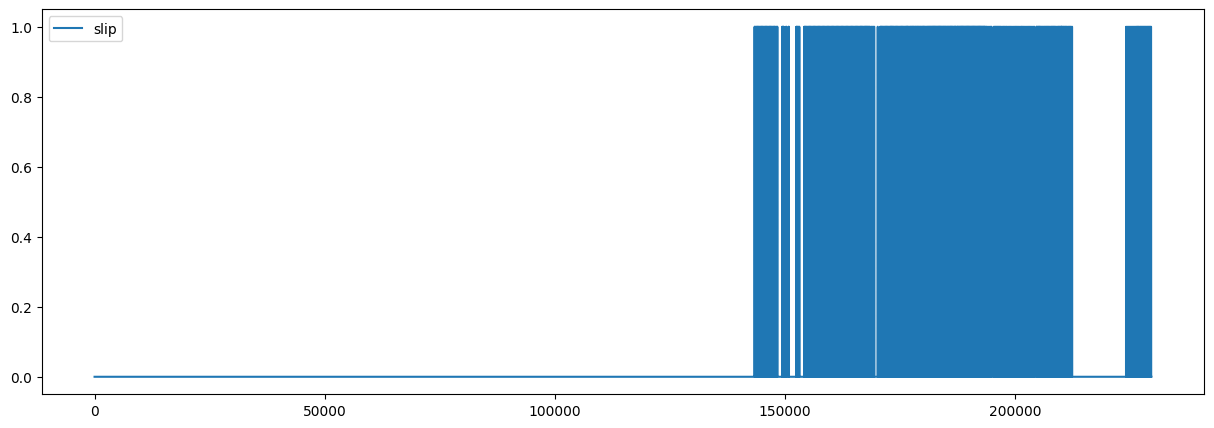

In [9]:
labels.plot(figsize=(15, 5))

In [32]:
labels['slip'].ne(0).idxmax()

143435

<AxesSubplot: >

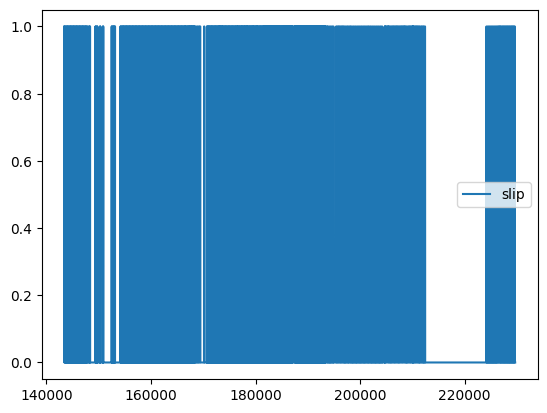

In [34]:
labels.loc[labels.index > 143435].plot()

In [43]:
X = df.values
y = labels.values

In [45]:
X.shape, y.shape

((229651, 48), (229651, 1))

In [47]:
X.__len__()

229651

In [48]:
class seq_dataset(Dataset):
    def __init__(self, X, y, seq_len):
        self.X = X
        self.y = y
        self.seq_len = seq_len
    def __len__(self):
        return self.X.__len__() - (self.seq_len-1)
    def __getitem__(self, index):
        return self.X[index:index+self.seq_len], self.y[index+self.seq_len-1]

In [59]:
dataset = seq_dataset(X, y, 10)
loader = DataLoader(dataset, batch_size=32)

In [65]:
for i in loader:
    print(i[0].shape)
    break

torch.Size([32, 10, 48])
